# Export Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [16]:
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", low_memory = False)

# Understanding Data

In [17]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [19]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

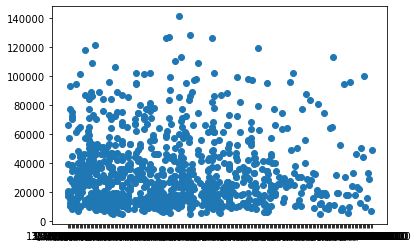

In [20]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

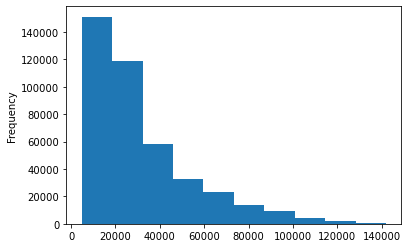

In [21]:
df.SalePrice.plot.hist();

## Parse Dates

In [23]:
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", low_memory = False, parse_dates=["saledate"])

In [24]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

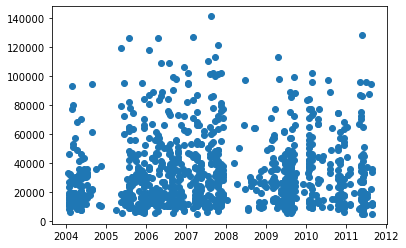

In [25]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [26]:
# see the columns
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [27]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [28]:
# sort the dataframe by saledate (we are working with time series data!)
df.sort_values(by=["saledate"], inplace = True, ascending = True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [29]:
# make a copy of the original dataframe
df_tmp = df.copy() # the default mode is deep copy for dataframes on pandas

# Feature Engineering

It is important to know if a sale was made at the start/ end of the quarter/ year. DateTime has in-built functions that can show those.

In [30]:
df_tmp["SaleYear"] = df_tmp.saledate.dt.year
df_tmp["SaleMonth"] = df_tmp.saledate.dt.month
df_tmp["SaleDay"] = df_tmp.saledate.dt.day
df_tmp["DayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["DayOfYear"] = df_tmp.saledate.dt.dayofyear

In [31]:
df_tmp.T.tail(6)

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
Steering_Controls,NaN,Conventional,NaN,Conventional,NaN,NaN,Conventional,Conventional,NaN,NaN,...,Conventional,NaN,NaN,Conventional,NaN,NaN,NaN,NaN,NaN,Conventional
SaleYear,1989,1989,1989,1989,1989,1989,1989,1989,1989,1989,...,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
SaleMonth,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
SaleDay,17,31,31,31,31,31,31,31,31,31,...,28,28,28,28,28,28,28,28,28,28
DayOfWeek,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
DayOfYear,17,31,31,31,31,31,31,31,31,31,...,119,119,119,119,119,119,119,119,119,119


In [32]:
df_tmp.drop("saledate", axis = 1, inplace = True)

In [33]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Correlation

In [34]:
corr = df_tmp.corr()
cor_target = abs(corr["SalePrice"])
relevant_features = cor_target[(cor_target > 0.05)]
relevant_features

SalePrice    1.000000
MachineID    0.216841
YearMade     0.154389
DayOfWeek    0.056015
Name: SalePrice, dtype: float64

In [35]:
relevant_num = list(relevant_features.index)
# I will also keep the saleyear to create a validation set
relevant_num.append("SaleYear")
cat_cols = list(set(df_tmp.columns) - set(df_tmp._get_numeric_data().columns))

In [36]:
cols_to_drop = set(df_tmp.columns) - set(cat_cols + relevant_num)

for i in cols_to_drop:
    df_tmp.drop(i, axis = 1, inplace = True)

In [37]:
df_tmp = df_tmp.reset_index(drop=True)
df_tmp.head()

,SalePrice,MachineID,YearMade,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,DayOfWeek
0,9500.0,1126363,1974,NaN,TD20,TD20,NaN,NaN,NaN,Medium,...,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1
1,14000.0,1194089,1980,NaN,A66,A66,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1
2,50000.0,1473654,1978,NaN,D7G,D7,G,NaN,NaN,Large,...,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1
3,16000.0,1327630,1980,NaN,A62,A62,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1
4,22000.0,1336053,1984,NaN,D3B,D3,B,NaN,NaN,NaN,...,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1


## Split Data to Train and Validation

In [38]:
df_val = df_tmp[df_tmp.SaleYear == 2012]
df_train = df_tmp[df_tmp.SaleYear != 2012]

df_val.shape, df_train.shape

((11573, 49), (401125, 49))

# Handling Missing Values

## Train Set

In [39]:
# handling categorical missing values for df_train
missing_cat_train = []
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        missing_cat_train.append(label)

In [40]:
for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_train[label] = pd.Categorical(content).codes + 1     

<ipython-input-40-f20f28d12fd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label] = pd.Categorical(content).codes + 1


In [41]:
# handling numerical missing values for df_train
missing_num_train = list(set(df_train.columns) - set(missing_cat_train))

for i in missing_num_train:
    df_train[i].fillna(df_train[i].mean(), inplace=True)

/Users/delaldeniztomruk/opt/anaconda3/envs/udemy/lib/python3.8/site-packages/pandas/core/series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [42]:
df_train.isna().sum().sum()

0

## Validation Set

In [43]:
# handling categorical missing values for df_val
missing_cat_val = []
for label, content in df_val.items():
    if pd.api.types.is_string_dtype(content):
        missing_cat_val.append(label)

In [44]:
set(missing_cat_train) - set(missing_cat_val)

set()

In [45]:
for label, content in df_val.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_val[label] = pd.Categorical(content).codes + 1    

<ipython-input-45-fd455e0e5bea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[label] = pd.Categorical(content).codes + 1


In [46]:
# handling numerical missing values for df_val
missing_num_val = list(set(df_val.columns) - set(missing_cat_val))

for i in missing_num_val:
    df_val[i].fillna(df_val[i].mean(), inplace=True)

In [47]:
set(missing_num_train) - set(missing_num_val)

set()

In [48]:
df_val.isna().sum().sum()

0

In [49]:
df_val.shape, df_train.shape

((11573, 49), (401125, 49))

## Split Data into X and y

In [50]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 48), (401125,), (11573, 48), (11573,))

```y_train``` and ```y_valid``` are already in type float64.

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 0 to 401124
Data columns (total 48 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   MachineID                401125 non-null  int64
 1   YearMade                 401125 non-null  int64
 2   UsageBand                401125 non-null  int8 
 3   fiModelDesc              401125 non-null  int16
 4   fiBaseModel              401125 non-null  int16
 5   fiSecondaryDesc          401125 non-null  int16
 6   fiModelSeries            401125 non-null  int8 
 7   fiModelDescriptor        401125 non-null  int16
 8   ProductSize              401125 non-null  int8 
 9   fiProductClassDesc       401125 non-null  int8 
 10  state                    401125 non-null  int8 
 11  ProductGroup             401125 non-null  int8 
 12  ProductGroupDesc         401125 non-null  int8 
 13  Drive_System             401125 non-null  int8 
 14  Enclosure                401125 non-

In [52]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11573 entries, 401125 to 412697
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   MachineID                11573 non-null  int64
 1   YearMade                 11573 non-null  int64
 2   UsageBand                11573 non-null  int8 
 3   fiModelDesc              11573 non-null  int16
 4   fiBaseModel              11573 non-null  int16
 5   fiSecondaryDesc          11573 non-null  int8 
 6   fiModelSeries            11573 non-null  int8 
 7   fiModelDescriptor        11573 non-null  int8 
 8   ProductSize              11573 non-null  int8 
 9   fiProductClassDesc       11573 non-null  int8 
 10  state                    11573 non-null  int8 
 11  ProductGroup             11573 non-null  int8 
 12  ProductGroupDesc         11573 non-null  int8 
 13  Drive_System             11573 non-null  int8 
 14  Enclosure                11573 non-null  int8 
 

# Modeling

In [53]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1, random_state = 42)
model.fit(X_train, y_train)
model.score(X_valid, y_valid)

0.426732578228023

## Evaluation Function

The competition uses ```RMSLE```.

In [54]:
y_preds = model.predict(X_valid)

In [55]:
from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(y_valid, y_preds))

0.5289643023137449

## Hyperparameter Tuning with RandomizedSearchCV

In [57]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10), 
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [1000]
          }


rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1, random_state = 42), 
                                                    param_distributions = rf_grid, 
                                                    n_iter = 100,
                                                    verbose = True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [58]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_samples': 1000,
 'max_features': 'auto',
 'max_depth': None}

In [59]:
y_preds_improved = rs_model.predict(X_valid)

np.sqrt(mean_squared_log_error(y_valid, y_preds_improved))

0.4404377030353826

In [60]:
import pickle

pickle.dump(rs_model, open("rs_model.pkl", 'wb'))

# Test Data

In [70]:
# import data

df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv", low_memory = False, parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [71]:
def preprocess_data(df):
    df["SaleYear"] = df.saledate.dt.year
    df["SaleMonth"] = df.saledate.dt.month
    df["SaleDay"] = df.saledate.dt.day
    df["DayOfWeek"] = df.saledate.dt.dayofweek
    df["DayOfYear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis = 1, inplace = True)
    
    relevant_features = ["SalePrice", "MachineID", "SaleYear", "YearMade", "DayOfWeek"]
    cat_cols = list(set(df.columns) - set(df._get_numeric_data().columns))
    cols_to_drop = set(df.columns) - set(cat_cols + relevant_num)

    for i in cols_to_drop:
        df.drop(i, axis = 1, inplace = True)
        
    df = df.reset_index(drop=True)
    
    # categorical
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes + 1 
            
    missing_cat_train = []
    for label, content in df_train.items():
        if pd.api.types.is_string_dtype(content):
            missing_cat_train.append(label)
    
    # handling numerical missing values for df_train
    missing_num_train = list(set(df.columns) - set(missing_cat_train))
    for i in missing_num_train:
        df[i].fillna(df[i].mean(), inplace=True)
        
    return df

In [72]:
test = preprocess_data(df_test)

In [73]:
model = pickle.load(open('rs_model.pkl', 'rb'))
preds = model.predict(test)

In [74]:
# format for kaggle
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv", low_memory = False, parse_dates=["saledate"])
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = preds
df_preds

,SalesID,SalesPrice
0,1227829,21829.415556
1,1227844,20097.990741
2,1227847,55545.555556
3,1227848,64824.305556
4,1227863,42276.335185
...,...,...
12452,6643171,37651.203704
12453,6643173,15361.648148
12454,6643184,14953.101852
12455,6643186,15896.694444


In [75]:
df_preds.to_csv("bluebook-for-bulldozers/test_predictions.csv", index=False)

# Feature Importance

In [78]:
model.best_estimator_.feature_importances_

array([5.60616571e-02, 2.09761558e-01, 3.48691557e-03, 4.22026221e-02,
       3.44481890e-02, 8.06477156e-02, 6.03309406e-03, 3.75698645e-02,
       1.69014596e-01, 4.77176613e-02, 1.92612926e-02, 2.81337850e-03,
       2.12116893e-03, 1.89196391e-03, 8.25815039e-02, 1.94557391e-03,
       7.42568382e-04, 1.55809982e-03, 6.18881380e-04, 2.11283306e-03,
       2.33484079e-04, 1.76338989e-03, 1.89925703e-02, 1.71747720e-03,
       5.96671499e-05, 5.58638967e-03, 5.80782240e-03, 1.50402317e-02,
       3.97743904e-03, 2.03441232e-03, 1.87258502e-02, 3.10456220e-03,
       6.25769327e-03, 6.47107541e-03, 1.08365527e-02, 4.52824283e-03,
       1.99240172e-03, 4.22767978e-03, 1.67436547e-03, 6.46238207e-04,
       1.09196354e-03, 2.86539509e-04, 7.60913943e-03, 1.85485573e-03,
       4.68125747e-04, 1.02132010e-03, 6.11846290e-02, 1.02147436e-02])

In [79]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

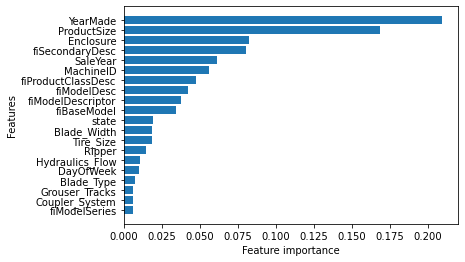

In [82]:
plot_features(X_train.columns, model.best_estimator_.feature_importances_)